<a href="https://colab.research.google.com/github/alibouch/TensorFlow_FSA/blob/master/linear-regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt



In [0]:
n_examples = 80 # number of training examples
training_steps = 1000 # number of steps we are going to train for
display_step = 100 # after multiples of this, we display the loss
learning_rate = 0.01 # multiplying factor on gradients
m, c = 6, -5 # gradient and y-intercept of our line, edit these for a different linear problem

In [0]:
#A function to calculate our predicted y, given weight and bias (m and c):
def train_data(n, m, c):
    x = tf.random.normal([n]) # n values taken from a normal distribution,
    noise = tf.random.normal([n])# n values taken from a normal distribution
    y = m*x + c + noise # our scatter plot
    return x, y
def prediction(x, weight, bias):
    return weight*x + bias # our predicted (learned) m and c, expression is like y = m*x + c

In [0]:
#A function to take the initial, or predicted, weights and biases and calculate the mean-squared loss (deviation) from y:

def loss(x, y, weights, biases): 
    error = prediction(x, weights, biases) - y # how 'wrong' our predicted (learned) y is
    squared_error = tf.square(error)
    return tf.reduce_mean(input_tensor=squared_error) # overall mean of squared error, scalar value.


In [0]:
#This is where TensorFlow comes into its own. Using a class called GradientTape(), we can write a function to calculate the derivatives (gradients) of our loss with respect to our weights and bias:

def grad(x, y, weights, biases):
    with tf.GradientTape() as tape:
      loss_ = loss(x, y, weights, biases)
      return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our weights and biases


Initial loss: 78.625


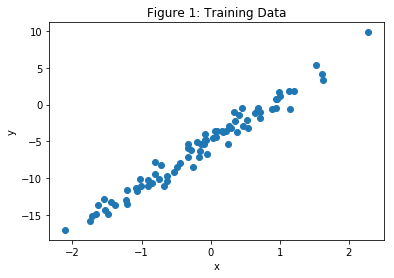

In [30]:
#Set up our regressor for the training loop and display the initial loss as follows:

x, y = train_data(n_examples,m,c) # our training values x and y
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: Training Data")
W = tf.Variable(np.random.randn()) # initial, random, value for predicted weight (m)
B = tf.Variable(np.random.randn()) # initial, random, value for predicted bias (c)

print("Initial loss: {:.3f}".format(loss(x, y, W, B)))

In [31]:
for step in range(training_steps): #iterate for each training step
  deltaW, deltaB = grad(x, y, W, B) # direction(sign) and value of the gradients of our loss    # with respect to our weights and bias
  change_W = deltaW * learning_rate # adjustment amount for weight
  change_B = deltaB * learning_rate # adjustment amount for bias
  W.assign_sub(change_W) # subract change_W from W
  B.assign_sub(change_B) # subract change_B from B
  if step==0 or step % display_step == 0:
    # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients
    print("Loss at step {:02d}: {:.6f}".format(step, loss(x, y, W, B)))


Loss at step 00: 75.431808
Loss at step 100: 2.218016
Loss at step 200: 0.971991
Loss at step 300: 0.942174
Loss at step 400: 0.941195
Loss at step 500: 0.941158
Loss at step 600: 0.941156
Loss at step 700: 0.941156
Loss at step 800: 0.941156
Loss at step 900: 0.941156


Final loss: 0.941
W = 5.9285759925842285, B = -5.03725528717041
Compared with m = 6.000, c = -5.000  of the original line


Text(0.5, 1.0, 'Figure 2: Line of Best Fit')

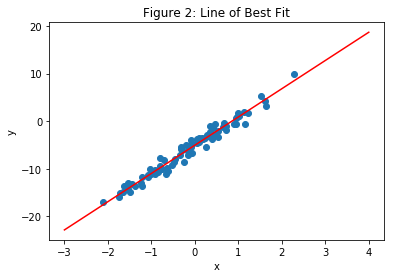

In [32]:
#The final results are as follows:

print("Final loss: {:.3f}".format(loss(x, y, W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
print("Compared with m = {:.3f}, c = {:.3f}".format(m, c)," of the original line")
xs = np.linspace(-3, 4, 50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(x,y)
plt.plot(xs,ys, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: Line of Best Fit")